In [1]:
import random
import numpy as np
import math
from sphere_fit import fit_sphere
import matplotlib.pyplot as plt
import math

In [2]:
def generate_sphere_points(noise =0.0):
    #generate random center point (x0, y0, z0) within [0, 500]
    x0 = random.uniform(0, 500)
    y0 = random.uniform(0, 500)
    z0 = random.uniform(0, 500)
    
    # Randomly select a pointer radius r between 20 and 100
    r = random.uniform(20, 100)
    
    # Randomly select an number of measurements n between 4 and 20
    n = random.randint(4, 20)
    
    # Generate n random points on the surface of the sphere
    points = []
    for _ in range(n):
        # Generate random spherical coordinates
        theta = random.uniform(0, 2 * math.pi)       # Angle around the z-axis
        phi = math.acos(random.uniform(0, 1))       # Angle from the z-axis, pointer cannot be below the dimple

        # Convert spherical coordinates to Cartesian coordinates
        x = x0 + r * math.sin(phi) * math.cos(theta) + np.random.normal(0, noise)
        y = y0 + r * math.sin(phi) * math.sin(theta) + np.random.normal(0, noise)
        z = z0 + r * math.cos(phi) + np.random.normal(0, noise)

        points.append((x, y, z))

    return points, r, x0, y0, z0



In [3]:
# Test data generation
points, r, x0, y0, z0 = generate_sphere_points(np.random.uniform(0, 5))

# Output the results
print(f"Center Point: ({x0:.2f}, {y0:.2f}, {z0:.2f})")
print(f"Radius: {r:.2f}")
print(f"Number of Points: {len(points)}")
print("Points on the Sphere Surface:")
for point in points:
    print(f"({point[0]:.2f}, {point[1]:.2f}, {point[2]:.2f})")


Center Point: (179.56, 359.61, 499.02)
Radius: 89.09
Number of Points: 14
Points on the Sphere Surface:
(187.71, 322.85, 571.05)
(105.90, 314.98, 506.98)
(210.13, 341.48, 574.09)
(171.36, 275.56, 504.47)
(131.82, 287.10, 502.40)
(237.91, 302.27, 516.32)
(165.81, 416.39, 569.63)
(147.92, 361.79, 582.35)
(121.25, 290.06, 511.50)
(258.04, 346.76, 526.66)
(233.54, 289.81, 533.53)
(153.99, 353.43, 586.72)
(232.98, 308.34, 549.98)
(135.91, 349.56, 580.41)


In [4]:
def total_pos_error(center, x0, y0, z0):
    ''' Returns the Euclidean distance between the estimated center and the true center '''
    return np.linalg.norm(center - np.array([x0, y0, z0]))

def total_radius_error(radius, r):
    ''' Returns the absolute difference between the estimated radius and the true radius '''
    return abs(radius - r)

### Visualize the data above

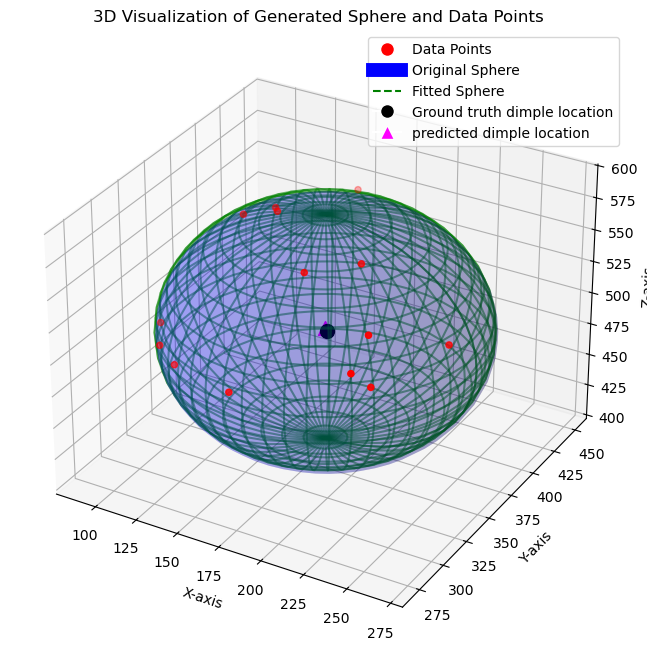

True Center: (179.5586, 359.6119, 499.0241)
True Radius: 89.0879

Estimated Center: (177.4879, 361.8131, 499.0096)
Estimated Radius: 88.8549
Sum of Squared Residuals: 2.0245e+02

Total Position Error: 3.0221
Total Radius Error: 0.2330


In [5]:
# Fit a sphere to the generated points
center, radius, residuals = fit_sphere(points)

# Prepare data for plotting
x_points = [p[0] for p in points]
y_points = [p[1] for p in points]
z_points = [p[2] for p in points]

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(x_points, y_points, z_points, color='r', label='Measurements')
ax.scatter(x0, y0, z0, color='black', marker='o', s=100, label='Ground truth dimple location')
ax.scatter(center[0], center[1], center[2], color='magenta', marker='^', s=100, label='predicted dimple location')


# Create data for the original sphere surface
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
x_sphere = x0 + r * np.cos(u) * np.sin(v)
y_sphere = y0 + r * np.sin(u) * np.sin(v)
z_sphere = z0 + r * np.cos(v)

# Plot the original sphere
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='b', alpha=0.2, label='Ground Truth')

# Optionally, plot the fitted sphere
x_fit_sphere = center[0] + radius * np.cos(u) * np.sin(v)
y_fit_sphere = center[1] + radius * np.sin(u) * np.sin(v)
z_fit_sphere = center[2] + radius * np.cos(v)
ax.plot_wireframe(x_fit_sphere, y_fit_sphere, z_fit_sphere, color='g', alpha=0.5, label='Fitted Sphere')

# Set plot labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Visualization of Generated Sphere and Data Points')

# Create custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Data Points',
                          markerfacecolor='r', markersize=10),
                   Line2D([0], [0], linestyle='-', markerfacecolor='b', color='b', label='Original Sphere', linewidth=10),
                   Line2D([0], [0], linestyle='--', color='g', label='Fitted Sphere'),
                   Line2D([0], [0], marker='o', color='w', label='Ground truth dimple location',
                          markerfacecolor='black', markersize=10),
                   Line2D([0], [0], marker='^', color='w', label='predicted dimple location',
                          markerfacecolor='magenta', markersize=10)]

ax.legend(handles=legend_elements)

# Show the plot
plt.show()

# Print the estimated and true sphere parameters
print(f"True Center: ({x0:.4f}, {y0:.4f}, {z0:.4f})")
print(f"True Radius: {r:.4f}")
print(f"\nEstimated Center: ({center[0]:.4f}, {center[1]:.4f}, {center[2]:.4f})")
print(f"Estimated Radius: {radius:.4f}")
print(f"Sum of Squared Residuals: {residuals:.4e}\n")

print(f"Total Position Error: {total_pos_error(center, x0, y0, z0):.4f}")
print(f"Total Radius Error: {total_radius_error(radius, r):.4f}")

In [6]:
i = 0
avg_p_error = 0
avg_r_error = 0
while(i < 100):
    i += 1
    # Generate test data
    points, r, x0, y0, z0 = generate_sphere_points(random.uniform(0, 5))
    # Print predicted results
    center, radius, residual_sum = fit_sphere(points)

    p_error = total_pos_error(center, x0, y0, z0)
    r_error = total_radius_error(radius, r)

    avg_p_error += p_error
    avg_r_error += r_error

    print(f"True Center: ({x0:.4f}, {y0:.4f}, {z0:.4f})")
    print(f"True Radius: {r:.4f}")
    print(f"Estimated Center: ({center[0]:.4f}, {center[1]:.4f}, {center[2]:.4f})")
    print(f"Estimated Radius: {radius:.4f}")

    print("Trial ", i, ":")
    print(f"Total Position Error: {p_error:.4f}")
    print(f"Total Radius Error: {r_error:.4f}\n")
    
print(f"Position Error: {avg_p_error:.4f}")
print(f"Radius Error: {avg_r_error:.4f}")
print(i)


print(f"Average Position Error: {avg_p_error/i:.4f}")
print(f"Average Radius Error: {avg_r_error/i:.4f}\n")


True Center: (110.4374, 377.3546, 343.0516)
True Radius: 25.3259
Estimated Center: (108.9525, 371.5863, 346.5243)
Estimated Radius: 23.9654
Trial  1 :
Total Position Error: 6.8948
Total Radius Error: 1.3605

True Center: (485.8525, 190.5617, 382.4441)
True Radius: 93.1526
Estimated Center: (483.9580, 191.4478, 380.0755)
Estimated Radius: 91.1880
Trial  2 :
Total Position Error: 3.1598
Total Radius Error: 1.9645

True Center: (254.8802, 332.9274, 71.2874)
True Radius: 25.5365
Estimated Center: (239.5590, 331.2717, 36.8573)
Estimated Radius: 53.8749
Trial  3 :
Total Position Error: 37.7215
Total Radius Error: 28.3385

True Center: (137.2977, 329.9715, 369.3738)
True Radius: 57.9152
Estimated Center: (135.9135, 328.3026, 369.8541)
Estimated Radius: 56.8386
Trial  4 :
Total Position Error: 2.2208
Total Radius Error: 1.0765

True Center: (81.9641, 227.4549, 434.8193)
True Radius: 91.0351
Estimated Center: (81.5448, 227.3133, 434.3448)
Estimated Radius: 91.5269
Trial  5 :
Total Position Erro